## Apply Decomposition

We will apply decomposition to apple's stock prices from 2020-10-9 to 2024-10-9 (total 4 years).

In [1]:
# All the different modules we'll need
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [51]:
# Gathering the data

ticker = "AAPL"
start_date = "2020-10-09"
end_date = "2024-10-09"

apple_data = yf.download(ticker, start=start_date, end=end_date)
apple_data = apple_data[['Close']]

[*********************100%***********************]  1 of 1 completed


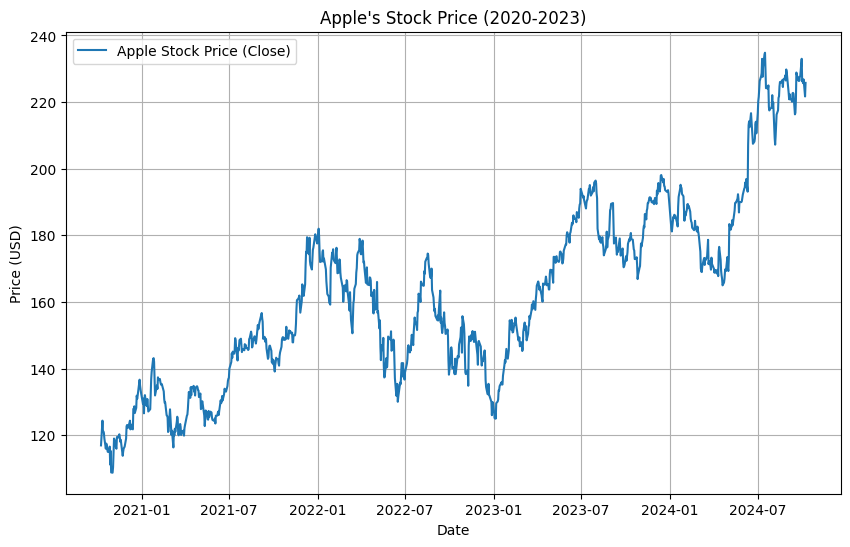

In [52]:
# Plot the closing prices

plt.figure(figsize=(10, 6))
plt.plot(apple_data['Close'], label='Apple Stock Price (Close)')
plt.title("Apple's Stock Price (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

## Monthly Decompostion

We will decompose the data on monthly basis trying to find patterns that occur yearly

### Standard Decomposition

In [53]:
# Resample the data to monthly frequency to highlight seasonal patterns
apple_monthly = apple_data.resample('ME').mean()

decomposition = seasonal_decompose(apple_monthly['Close'], model='additive', period=13)

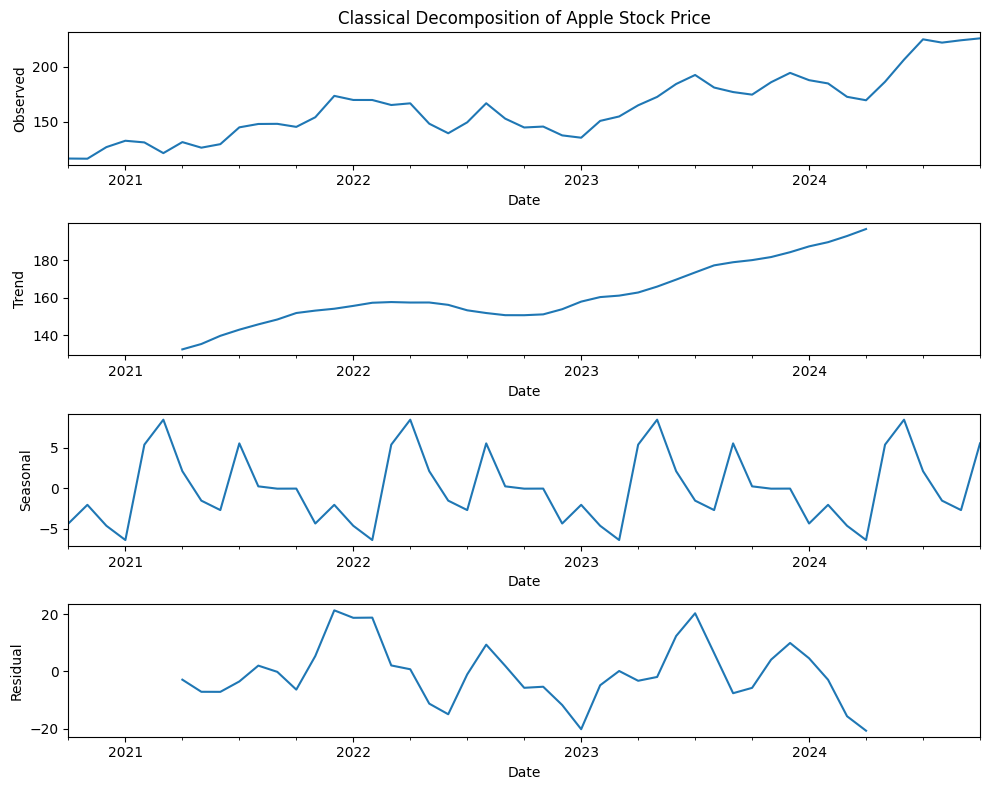

In [54]:
# Plot the decomposed components

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))



decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('Classical Decomposition of Apple Stock Price')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

### STL Decomposition

In [55]:
# STL allows more flexibility in handling seasonality and trend
stl = STL(apple_monthly['Close'], seasonal=13)
result = stl.fit()

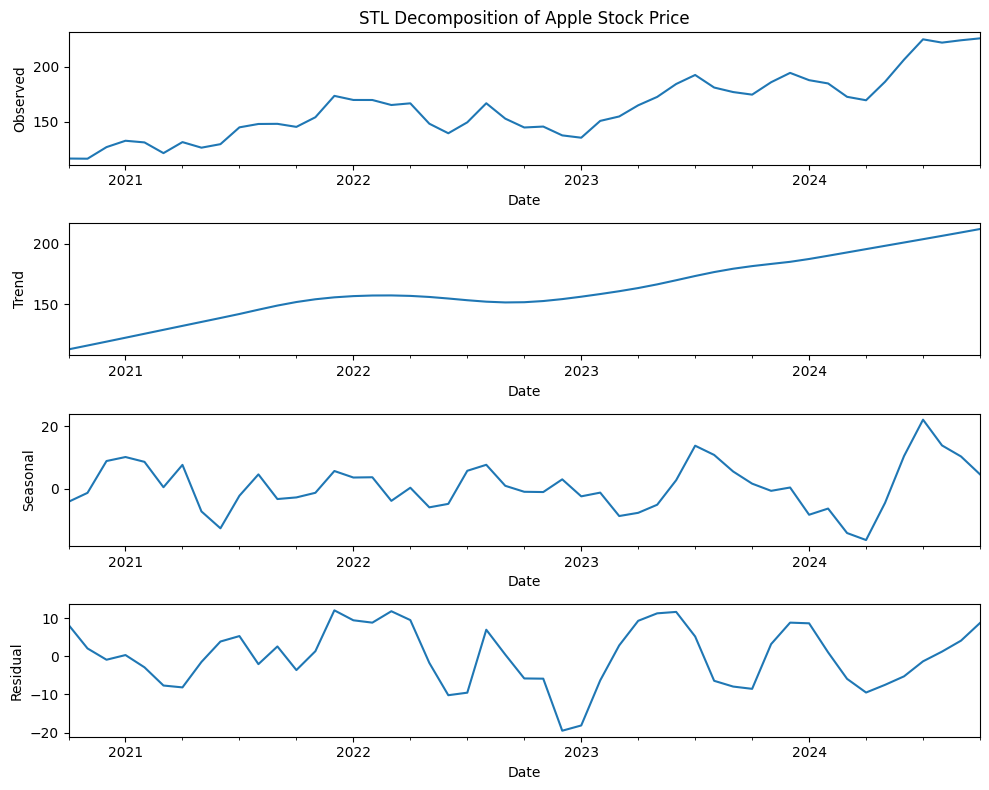

In [56]:
# Plot the decomposed components

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('STL Decomposition of Apple Stock Price')

result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

## Weekly Decomposition

We will decompose the data on daily basis and try to find patterns that occur every week.

### Standard Decomposition

In [57]:
apple_weekly = apple_data.resample('W').mean()

decomposition = seasonal_decompose(apple_weekly['Close'], model='additive', period=52)

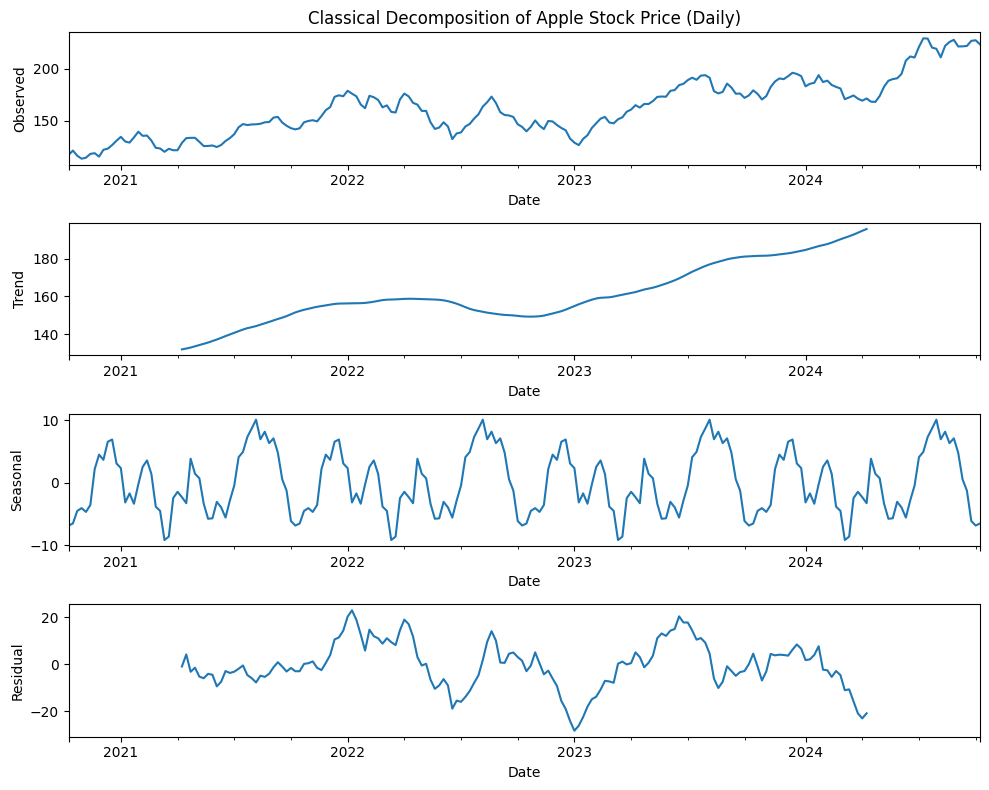

In [58]:
# Plot the components

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('Classical Decomposition of Apple Stock Price (Daily)')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

### STL Decomposition

In [60]:
stl = STL(apple_weekly['Close'], seasonal=53)

result = stl.fit()

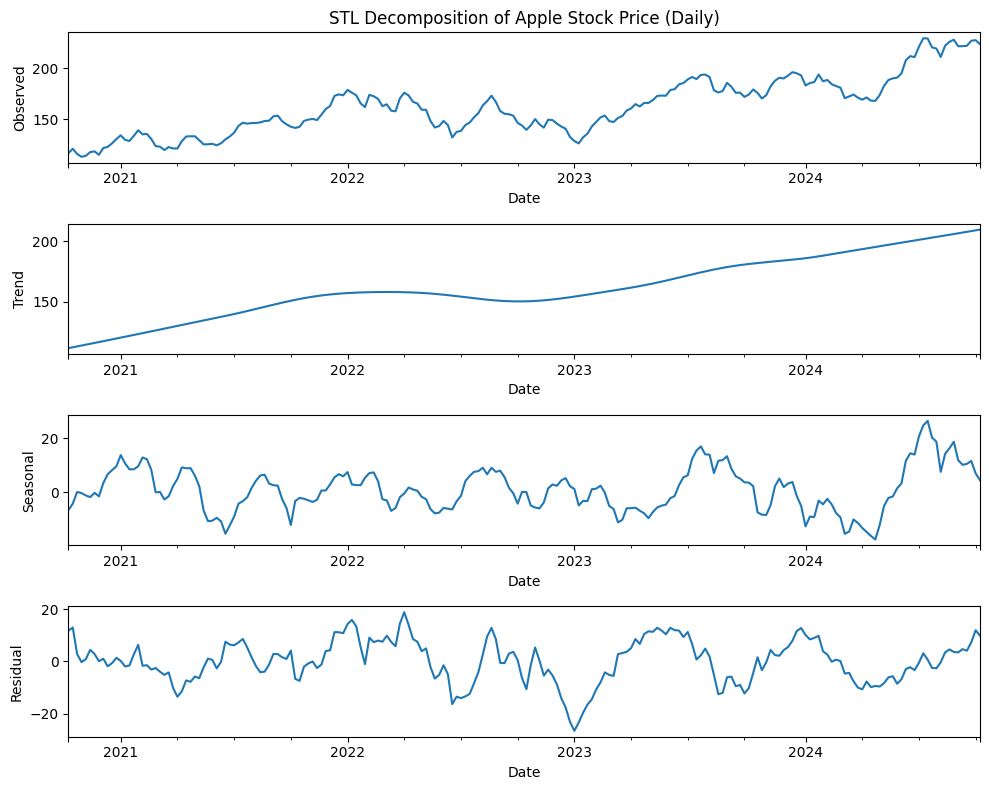

In [61]:
# Plot the components

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('STL Decomposition of Apple Stock Price (Daily)')

result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

## Daily Decomposition

In [78]:
# Gathering data for a year's performance

ticker = "AAPL"
start_date = "2023-10-09"
end_date = "2024-10-09"

apple_data = yf.download(ticker, start=start_date, end=end_date)
apple_data = apple_data[['Close']]

[*********************100%***********************]  1 of 1 completed


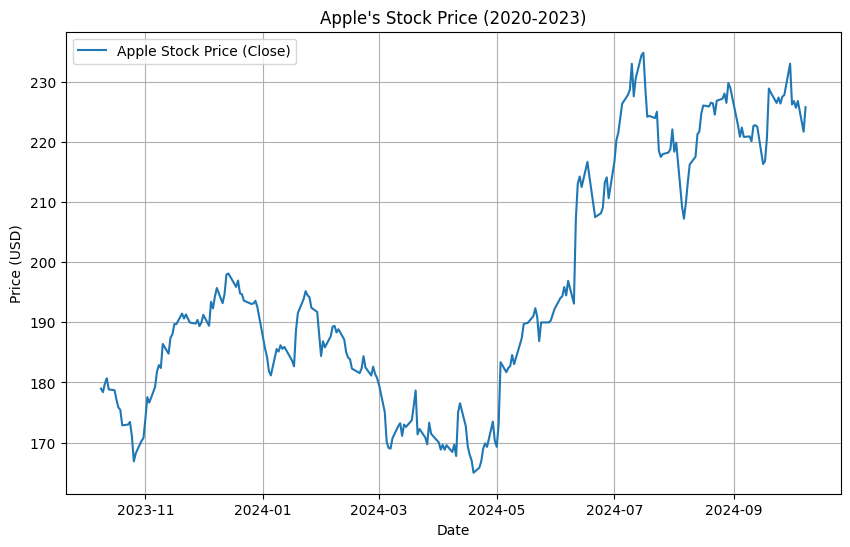

In [82]:
# Plot the closing prices

plt.figure(figsize=(10, 6))
plt.plot(apple_data['Close'], label='Apple Stock Price (Close)')
plt.title("Apple's Stock Price (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

### Standard Decomposition

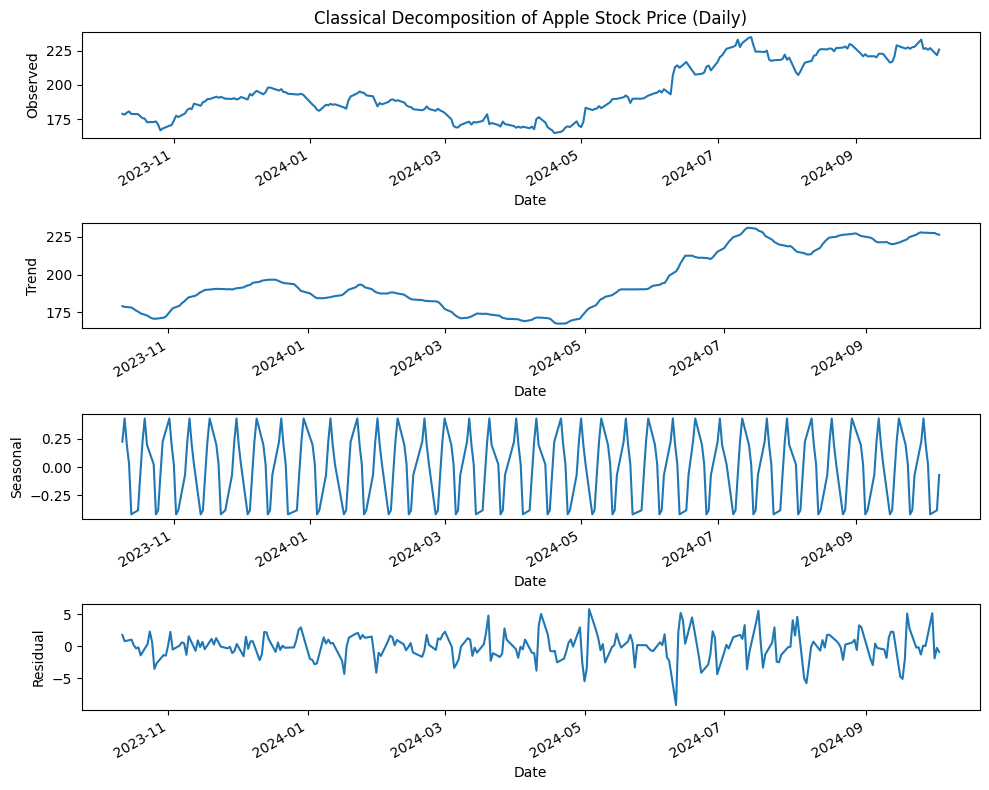

In [83]:
decomposition = seasonal_decompose(apple_data['Close'], model='additive', period=7)

# Plot the components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('Classical Decomposition of Apple Stock Price (Daily)')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

### STL Decomposition

In [89]:
apple_daily = apple_data.resample('D').mean().ffill()

stl = STL(apple_daily, seasonal=7)

result = stl.fit()

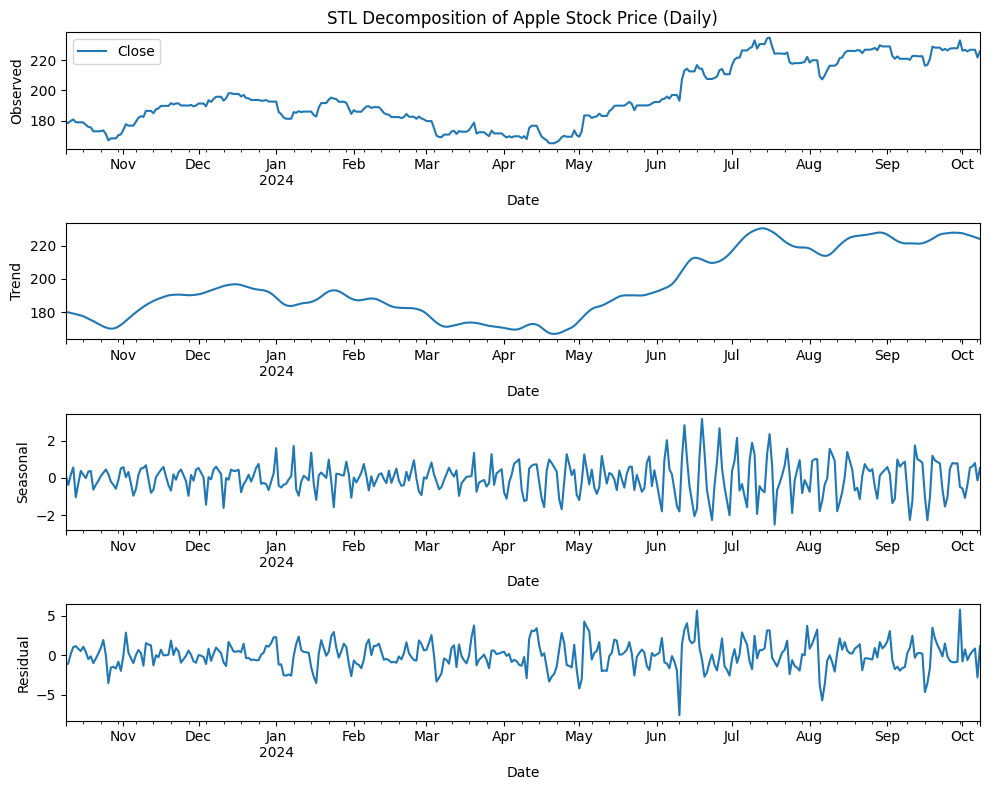

In [90]:
# Plot the components

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('STL Decomposition of Apple Stock Price (Daily)')

result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

## Understanding the `period` Argument

The `period` argument defines the seasonality length, i.e., a period value of 7 expects that the dat ahas a repeating pattern every 7 observation (and because we have gathered daily stock prices, the function will treat the data as having a weekly seasonality)

### When to use diffferent period values

* Weekly Seasonality (period=7): If you’re using daily data and believe that there’s a weekly pattern in stock prices (e.g., prices fluctuate similarly every Monday, Tuesday, etc.), you can set period=7 to reflect this.

* Monthly Seasonality (period ≈ 30): For daily data, if you think there's a monthly repeating cycle, you might set period=30.

* Yearly Seasonality (period=365): If you're analyzing daily data and expect an annual seasonality pattern (such as yearly stock market fluctuations), you would set the period to 365.

* Custom Period: If your data is in another frequency, such as weekly or monthly, you would adjust the period accordingly (e.g., period=12 for monthly data with yearly seasonality).

Example Scenarios:
* Daily Data with Weekly Seasonality: period=7
* Hourly Data with Daily Seasonality: period=24 (hours per day)
* Monthly Data with Yearly Seasonality: period=12 (months per year)


## Using Daily Data with Weekly Seasonality

When you use raw daily data while expecting weekly seasonality, you’re looking for trends or repeating patterns that happen within the week while still analyzing data at the daily level. Here’s why you might choose this approach:
1. **Capturing Daily Fluctuations:**
* By keeping the data at a daily resolution, you can analyze how prices change from day to day. This is crucial for understanding short-term trends and volatility.
    * For example, you might find that prices tend to rise on certain days (e.g., Monday) and fall on others (e.g., Friday). This information can be useful for short-term trading strategies.

2. **Detailed Insights:**
* Using daily data allows for a more granular analysis. If there are specific events or news that affect the stock price on a particular day, this will be visible when you look at daily data.
    * For instance, if there’s an earnings report released on a Tuesday, you can see the immediate impact on that day’s price rather than losing that detail by averaging the prices over a week.

3. **Accurate Seasonal Patterns:**
* When you apply decomposition to daily data with a weekly period (period=7), the decomposition will try to identify how the price behaves across the week while accounting for the daily variations.
    * This means the model can differentiate between a typical Monday's price versus a typical Friday's price, capturing the day-specific seasonal effects.


## Identify Cyclic Patterns

To analyze cyclic patterns in Apple stock prices, we will follow these steps:

1. Load the Apple stock price data.
2. Visualize the data to identify potential cyclic patterns.
3. Decompose the time series to separate trend, seasonality, and residuals, which can help us observe any cyclic patterns indirectly.
4. Identify Cyclic Patterns: While cyclic patterns don't have a fixed method for identification like trend or seasonality, we can analyze the residuals and the overall long-term fluctuations for potential cyclic behavior.

In [43]:
# Gathering the data

ticker = "AAPL"
start_date = "2010-10-09"
end_date = "2024-10-09"

apple_data = yf.download(ticker, start=start_date, end=end_date)
apple_data = apple_data[['Close']]

[*********************100%***********************]  1 of 1 completed


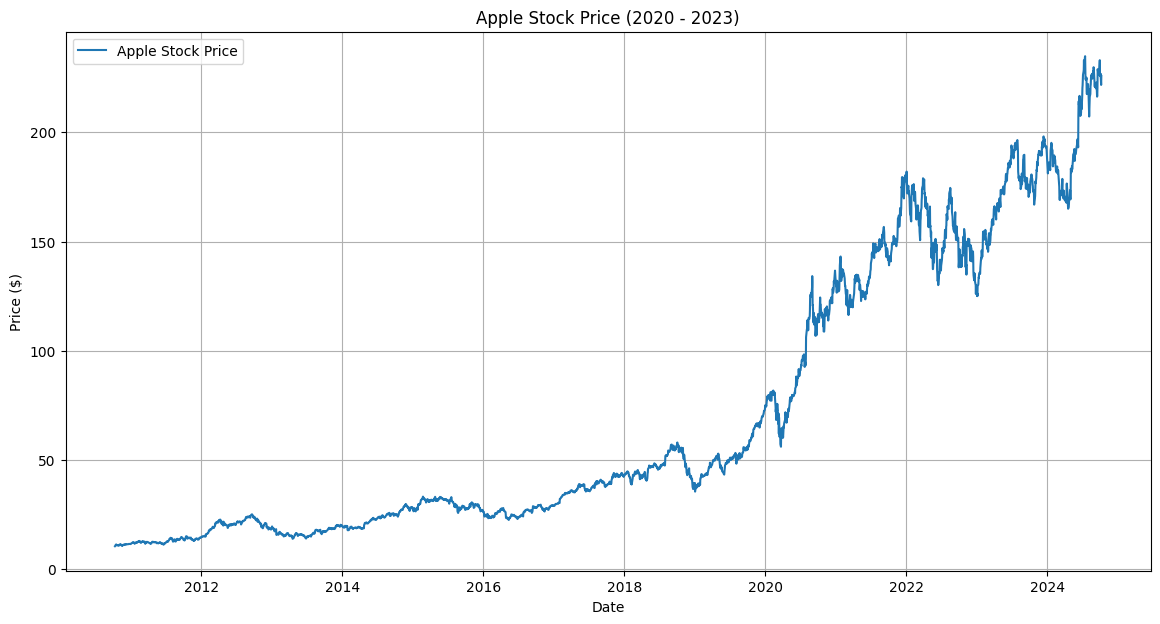

In [44]:
# Visalize the data

plt.figure(figsize=(14, 7))
plt.plot(apple_data['Close'], label='Apple Stock Price')
plt.title('Apple Stock Price (2020 - 2023)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()


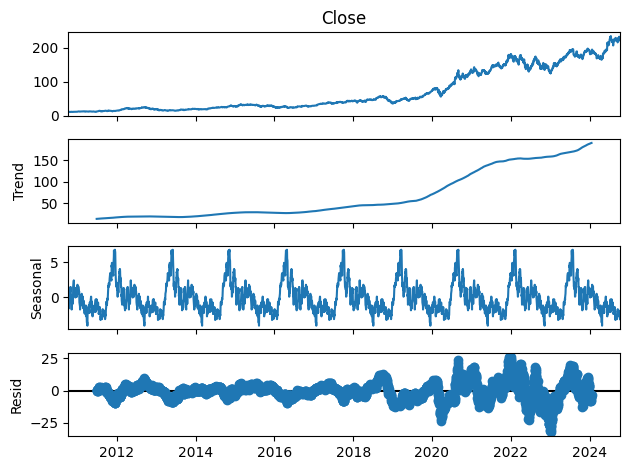

In [45]:
# Decompose the Time Series

# Decompose the time series
decomposition = seasonal_decompose(apple_data['Close'], model='additive', period=365)

# Plot the decomposition
decomposition.plot()
plt.show()


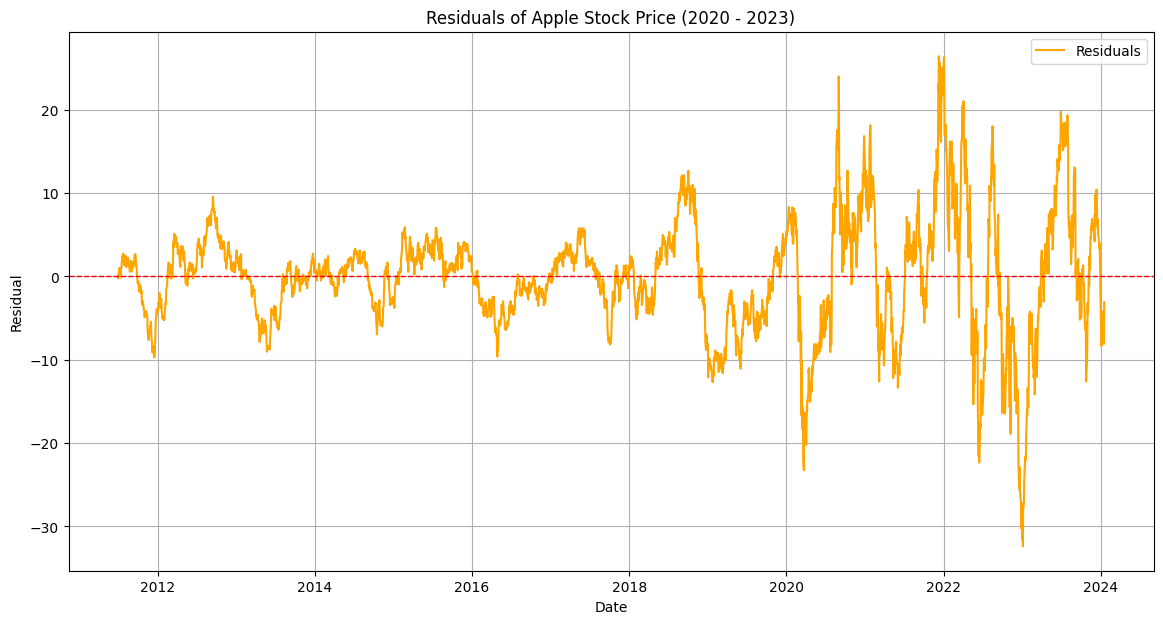

In [46]:
# Analyze Residuals for Cyclic Patterns

# Extract residuals
residuals = decomposition.resid

# Plot the residuals
plt.figure(figsize=(14, 7))
plt.plot(residuals, label='Residuals', color='orange')
plt.title('Residuals of Apple Stock Price (2020 - 2023)')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.grid()
plt.show()
